In [13]:
import math
from functools import partial
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from sklearn.datasets import make_swiss_roll


In [7]:
class MY_PCA:#自作主成分分析
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = []
    
    def fit_transform(self, X): #次元削減したXを返す
        def dot(v, w): #内積
            return sum(v_i * w_i for v_i, w_i in zip(v, w))
        
        def magnitude(v): #ベクトルの大きさ
            return math.sqrt(dot(v, v))
        
        def direction(w): #単位ベクトル
            mag = magnitude(w)
            return w / mag
        
        def variance(X, w): #各データの分散の和
            return sum((projection_length) ** 2 for projection_length in np.dot(w, X.T))
        
        def gradient_i(x_i, w): #1個のデータの勾配
            return np.array([2 * dot(x_i, w) * x_ij for x_ij in x_i])
        
        def gradient(X, w): #各データの勾配の和
            grad = gradient_i(X[0], w)
            for x_i in X[1:]:
                grad += gradient_i(x_i, w)
            return grad
        
        def first_principal_component(X): #Xの第1主成分を求める
            w = np.array([1] * len(X[0])) #初期値設定
            w = direction(w)
            value = variance(X, w)
            step_sizes = [100, 10, 1, 0.1, 0.01, 0.001] #学習率
            tolerance = 0.0001
            
            while True:
                grad = gradient(X, w)
                next_ws = [w + step_size * grad for step_size in step_sizes]
                next_w = max(next_ws, key=partial(variance, X))
                next_w = direction(next_w)
                next_value = variance(X, next_w)
                
                if abs(value - next_value) < tolerance: #収束判定
                    return next_w
                else:
                    w, value = next_w, next_value
        
        def mean(x): #平均
            return sum(x) / len(x)
        
        means = np.array([mean(X[:, i]) for i in range(len(X[0]))])
        X_ = X - means #各列の平均をにする
        
        for _ in range(self.n_components):
            component = first_principal_component(X_)
            self.components.append(component)
            component = component.reshape(len(X_[0]), 1)
            X_ -= np.dot(np.dot(X_, component), component.T)
        
        return np.array([[dot(x_i, component) for component in self.components] for x_i in X]) #変換後データ
            

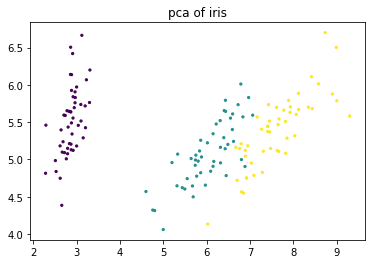

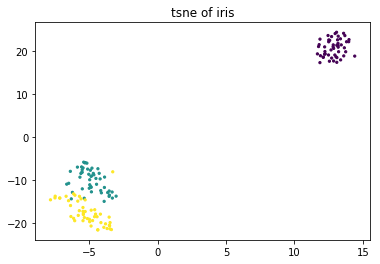

In [8]:
#iris
iris = load_iris()
X, y = iris.data, iris.target

my_pca = MY_PCA(2)
X2 = my_pca.fit_transform(X)
plt.title('pca of iris')
plt.scatter(X2[:, 0], X2[:, 1], c=y, s=5)
plt.show()

tsne = TSNE(2)
X2 = tsne.fit_transform(X)
plt.title('tsne of iris')
plt.scatter(X2[:, 0], X2[:, 1], c=y, s=5)
plt.show()


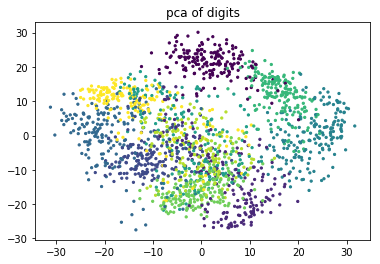

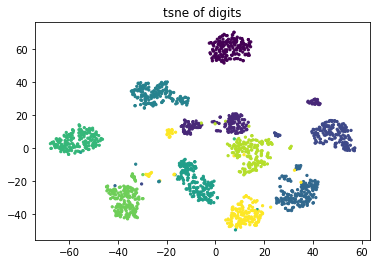

In [19]:
#digits
digits = load_digits()
X, y = digits.data, digits.target

pca = PCA(2) #自作PCAでは遅すぎたので、ライブラリを使う
X2 = pca.fit_transform(X)
plt.title('pca of digits')
plt.scatter(X2[:, 0], X2[:, 1], c=y, s=5)
plt.show()

tsne = TSNE(2)
X2 = tsne.fit_transform(X)
plt.title('tsne of digits')
plt.scatter(X2[:, 0], X2[:, 1], c=y, s=5)
plt.show()


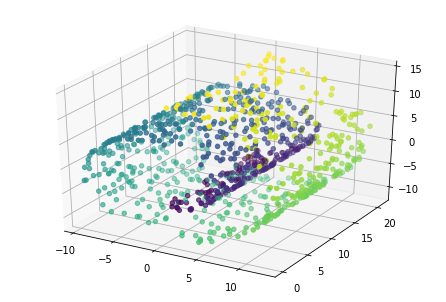

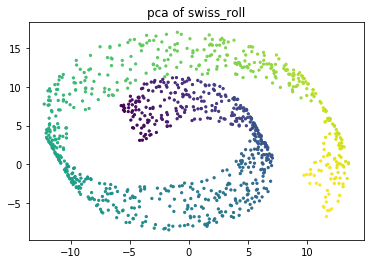

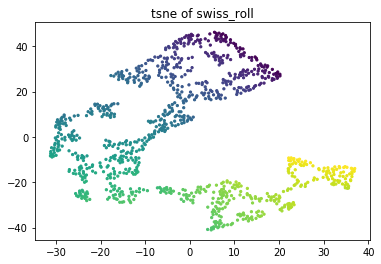

In [15]:
#swiss_roll
X, y = make_swiss_roll(1000)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
plt.show()

my_pca = MY_PCA(2)
X2 = my_pca.fit_transform(X)
plt.title('pca of swiss_roll')
plt.scatter(X2[:, 0], X2[:, 1], c=y, s=5)
plt.show()

tsne = TSNE(2)
X2 = tsne.fit_transform(X)
plt.title('tsne of swiss_roll')
plt.scatter(X2[:, 0], X2[:, 1], c=y, s=5)
plt.show()
